In [129]:
#libraries
import numpy as np
import pandas as pd
from time import time

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.ensemble import RandomForestClassifier

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
newStopWords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's', 'co']
stop_words = stopwords.words('english')
stop_words.extend(newStopWords)

from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lematizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

import gensim
from gensim.models import Word2Vec
print(gensim.__version__)

4.1.2


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# df = pd.read_csv("./data/cyberbullying_tweets.csv")
df = pd.read_csv("./data/df_with_lang.csv")

In [6]:
# !pip install langdetect

# from langdetect import detect, DetectorFactory

# # Language detection algorithm is non-deterministic, 
# # which means that if you try to run it on a text which is either too short or too ambiguous,
# # you might get different results everytime you run it.
# DetectorFactory.seed = 0

# # Detecting language and errors 
# cnt = 0
# for row in X:
#     try : df.loc[cnt, 'language'] = detect(row)
#     except Exception as exception:
#         print("Error in language detection : tweet n°", cnt, "-->", df.tweet_text[cnt])
#     cnt += 1

# df.loc[31676]
df.language.value_counts(normalize=True)[:5]

# df.to_csv("data/df_with_lang.csv",index=False)

Error in language detection : tweet n° 4011 --> ♪♥♪
Error in language detection : tweet n° 8695 --> 😂😂😂😂😂
Error in language detection : tweet n° 14458 --> 👧👧👧👧 …
Error in language detection : tweet n° 14691 --> ♫♪
Error in language detection : tweet n° 24110 --> ?????????
Error in language detection : tweet n° 24529 --> 5/16/15
Error in language detection : tweet n° 25032 --> 01:15:19:00
Error in language detection : tweet n° 25846 --> 5/14/15
Error in language detection : tweet n° 26069 --> 💃🍦🐙😇🌸🌟
Error in language detection : tweet n° 26461 --> 5/11/15
Error in language detection : tweet n° 27618 --> 5/17/15
Error in language detection : tweet n° 27928 --> 5/13/15
Error in language detection : tweet n° 28228 --> &#128533;
Error in language detection : tweet n° 28468 --> :-)
Error in language detection : tweet n° 28855 --> 💩
Error in language detection : tweet n° 31214 --> 5/12/15
Error in language detection : tweet n° 31286 --> .
Error in language detection : tweet n° 31676 --> 5/10/

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
 2   language            47674 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


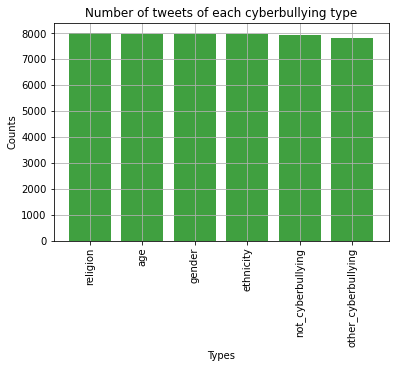

In [4]:
index = df.cyberbullying_type.value_counts().index.tolist()
values = df.cyberbullying_type.value_counts().values.tolist()

plt.bar(index, values, facecolor='g', alpha=0.75)

plt.xlabel('Types')
plt.ylabel('Counts')
plt.title('Number of tweets of each cyberbullying type')
# Rotation of the bar names
plt.xticks(index, rotation=90)
# plt.subplot_adjust(bottom=0.01, top=0.99)

plt.grid(True)
plt.show()

In [5]:
types = {'age':0,
         'ethnicity':1,
         'gender':2,
         'not_cyberbullying':3,
         'other_cyberbullying':4,
         'religion':5}

df['target'] = df['cyberbullying_type'].replace(types, inplace=False)
df[:10]

,tweet_text,cyberbullying_type,language,target
0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,3
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,en,3
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,id,3
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,en,3
8,@stockputout everything but mostly my priest,not_cyberbullying,en,3
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,en,3


In [154]:
# X = df.tweet_text
# X = [''.join(item.lower() for item in x if item.isalpha() or item == " ") for x in X]
# X = [x.split(" ") for x in X]
# # X[:10]

# Y = df.target
# Y = [y for y in Y]
# Y = np.reshape(Y, (len(Y), 1))
# # Y[:10]

In [153]:
# X_en = df[df.language == 'en'].tweet_text
# X_en = [''.join(item.lower() for item in x if item.isalpha() or item == " ") for x in X_en]
# X_en = [x.split(" ") for x in X_en]
# # X_en[:10]

# Y_en = df[df.language == 'en'].target
# Y_en = [y for y in Y_en]
# Y_en = np.reshape(Y_en, (len(Y_en), 1))
# # Y_en[:10]

In [134]:
df_en = df[df.language == 'en']

def clean_text(text):
    
    text = text.apply(lambda x: ''.join(item.lower() for item in x))
    text = text.apply(lambda x: ' '.join(word for word in x.split(" ") if not word.startswith('@')))
    text = text.apply(lambda x: ''.join([lematizer.lemmatize(w) for w in x]))
    
    mapping = [ ('\d+', ''), ('https?:', ''), ('http?:', '') ]
    for k, v in mapping:
        text = text.str.replace(k, v)

    return text

df_en['tweet_text_tranformed'] = clean_text(df_en.tweet_text) 
df_en.tweet_text_tranformed

In [155]:
random_state = np.random.RandomState(0)

X = df_en.tweet_text_tranformed
y = df_en.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train, y_train = X_train.reset_index(drop=True), y_train.reset_index(drop=True)
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape:  {}".format(X_test.shape))

X_train shape: (31240,)
X_test shape:  (13389,)


In [163]:
vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), max_df=0.7, min_df=4)
# max_df : removes term with DF higher than the 70% of the documents
# min_df : terms must have DF>=4 to be considered

start = time()
X_train_tfidf = vectorizer.fit_transform(X_train)
vec_time = time() - start

print("Extracting features from X using TfidfVectorizer")
print("n_samples: %d, n_features: %d" % X_train_tfidf.shape)
print("TfidfVectorizer takes %fs" % vec_time)

features = vectorizer.get_feature_names_out()

X_test_tfidf = vectorizer.transform(X_test)

features[:10]

Extracting features from X using TfidfVectorizer
n_samples: 31240, n_features: 17501
TfidfVectorizer takes 1.053917s


array(['__', '___', '____', '_xd_', 'aa', 'aaa', 'aaaand', 'ab',
       'abandoned', 'abc'], dtype=object)

In [9]:
def top_tfidf_feats(row, features, top_n=25):
    '''Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df


def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, max_tfidf=0.3, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    D[D > max_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)


def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, max_tfidf=0.3, top_n=25):
    '''Return a list of dfs, where each df holds top_n features and their mean tfidf value
       calculated across documents with the same class label.'''
    dfs=[]
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, max_tfidf=max_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [142]:
row = df_en.tweet_text_tranformed[0]

Xtr = X_train_tfidf

ytr = y_train

dfs = top_feats_by_class(Xtr, ytr, features)
# top_mean_feats(Xtr, features)

In [143]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [144]:
len(dfs)

6

In [150]:
dfs[5]

,feature,tfidf
0,muslims,0.035014
1,muslim,0.034043
2,idiot,0.027704
3,christian,0.024832
4,idiots,0.022193
5,islam,0.021335
6,islamic,0.020812
7,radical,0.018759
8,terrorism,0.017895
9,right,0.017851


In [168]:
class Tree():
    def __init__(self, max_depth, min_samples_split=2, min_samples_leaf=1, splitting=True):
        """Tree Descision Classifier.

        Args:
            max_depth (int): The maximum depth of the tree.
            
            min_samples_split (int): The minimum number of samples
                required to split an internal node.
                
            min_samples_leaf (int): The minimum number of samples
                required to be at a leaf node.
                
            splitting (Boolean): to increase speed and prevent overfitting,
                we do not calculate the impurity for each node but for
                each decile if True.
        """
        assert max_depth >= 1, "max_depth must be greater or equal than 1"
        assert min_samples_split >= 2, "min_samples_split must be greater or equal than 2"
        assert min_samples_leaf >= 1, "min_samples_leaf must be greater or equal than 1"
        
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.splitting = splitting
        self.nodes = {"root": {}}
        
    def gini_index(self, sub, m):
        proportions = sum([((sub[:,-1] == x).sum() / len(sub))**2 for x in np.unique(sub[:,-1])])
        return (1 - proportions) * (len(sub) / m)

    def get_split(self, X, depth, node):
        
        m = len(X)
        
        if depth != 0 and m >= self.min_samples_split:
            
            best_split = None
            best_feature = None
            best_value = float("inf")
            
            for feature in range(len(X[0]) - 1):
                
                if self.splitting == False: uniques = np.unique(X[:,feature])
                else: uniques = np.percentile(X[:,feature], np.arange(10,100,10))

                for split in uniques:
                    A, B = X[X[:,feature] <= split], X[X[:,feature] > split]
                    if len(A) >= self.min_samples_leaf and len(B) >= self.min_samples_leaf:
                        value = self.gini_index(A, m) + self.gini_index(B, m)
                        if value < best_value:
                            best_value = value
                            best_feature = feature
                            best_split = split
            
            if best_feature is not None:
                A, B = X[X[:,best_feature] <= best_split], X[X[:,best_feature] > best_split]
                node["feature"] = best_feature
                node["gini_index"] = best_value
                node["split"] = best_split
                node["A"] = {}
                node["B"] = {}
                node["class_A"] = np.unique(A[:,-1])[np.argmax([(A[:,-1] == x).sum() for x in np.unique(A[:,-1])])]
                node["class_B"] = np.unique(B[:,-1])[np.argmax([(B[:,-1] == x).sum() for x in np.unique(B[:,-1])])]
                self.get_split(A, depth-1, node["A"])
                self.get_split(B, depth-1, node["B"])
                
    
    def fit(self, X, y):
        X = np.append(X,y, axis=1)
        self.get_split(X, self.max_depth, self.nodes["root"])
        
    def predict(self, X):
        node = self.nodes["root"]
        while True:
            if X[node["feature"]] <= node["split"]:
                if not node["A"]:
                    return node["class_A"]
                else:
                    node = node["A"]
            else:
                if not node["B"]:
                    return node["class_B"]
                else:
                    node = node["B"]
    
    def score(self, X, Y):
        count = 0
        for x, y in zip(X,Y):
            if self.predict(x) == y: count += 1
        return count/len(X)
    

class RandomForest():
    def __init__(self, n_estimators):
        """Random Forest Estimator

        Args:
            n_estimators (int):Number of estimators
        """
        assert n_estimators >= 2, "max_depth must be greater or equal than 2"
        self.n_estimators = n_estimators
        
    def fit(self, X, y):
        
        self.all_trees = []
        
        # We sample only 2/3 of the total input dataset
        sub_size = round(len(X)*(2/3))
        for i in range(self.n_estimators):
            id = np.random.randint(0,len(X),sub_size)
            subX = np.array(X)[id]
            suby = y[id.astype(int)]
            t = Tree(10)
            t.fit(subX, suby)
            self.all_trees.append(t)
            
    def predict(self, X):
        predictions = []
        for t in self.all_trees:
            predictions.append(t.predict(X))
        return max(set(predictions), key=predictions.count)

    def score(self, X, Y):
        count = 0
        for x, y in zip(X,Y):
            if self.predict(x) == y: count += 1
        return count/len(X)

In [170]:
clf = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 6, min_samples_leaf= 1, random_state=42)
clf.fit(X_train_tfidf, y_train)
print("sk-learn model score: ", clf.score(X_test_tfidf, y_test))

# model = Tree(max_depth=10, min_samples_split = 6, min_samples_leaf= 1, splitting=10)
# model.fit(X_train_tfidf, y_train)
# print("Homemade model score: ", model.score(X_test_tfidf, y_test))

sk-learn model score:  0.6939278512211516


In [172]:
clf = RandomForestClassifier(n_estimators=10)

start = time()
clf.fit(X_train_tfidf, y_train)
sklearn_RF_time = time() - start
print("sk-learn model score: ", clf.score(X_test_tfidf, y_test))
print("sk-learn model takes %fs" % sklearn_RF_time)

# model = RandomForest(10)

# start = time()
# model.fit(X_train, y_train)
# homemade_RF_time = time() - start
# print("\nHomemade model score: ", model.score(X_test, y_test))
# print("Homemade model takes %fs" % homemade_RF_time)

sk-learn model score:  0.8075285682276495
sk-learn model takes 6.749825s
